# Introduction

So to begin with, the purpose of the dataset is to determine patterns, trends, or interesting points of information regarding political ads broadcasted through Snapchat. There are 4268 entries total, and for each observation, the dataset contains information on

`ADID, CreativeUrl, Currency Code, Spend, Impressions, StartDate, EndDate, OrganizationName, BillingAddress, CandidateBallotInformation, PayingAdvertiserName, Gender, AgeBracket, CountryCode, Regions (Included), Regions (Excluded), Electoral Districts (Included), Electoral Districts (Excluded), Radius Targeting (Included), Radius Targeting (Excluded), Metros (Included), Metros (Excluded), Postal Codes (Included), Postal Codes (Excluded), Location Categories (Included), Location Categories (Excluded), Interests, OsType, Segments, Language, AdvancedDemographics, Targeting Connection Type, Targeting Carrier (ISP), CreativeProperties`


This information enables identifying key factors to the following questions:

 - What ad characteristics result in a higher number of ad plays (Impressions)?
 - How does the Spend/Cost spent on ads correspond to the Country?

In answering these questions, it's likely the attributes of greatest interest include:
 - Spend (to identify correlation with Country and to identify low budget ads)
 - Impressions (to determine the factors correlated with total number of ad plays)
 - CountryCode (to identify patterns in ad spending based on country)
 - Currency Code (to uniformize monetary values and determine countries with supposed healthier economies)
 - OsType (just a small factor with potential correlations worth investigating)

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
# Read csv files into DataFrames and concatenate them together.
ads_2018 = pd.read_csv('PoliticalAds_2018.csv')
ads_2019 = pd.read_csv('PoliticalAds_2019.csv')
combined_df = pd.concat([ads_2018, ads_2019])

# Convert StartDate and EndDate columns into datetime format.
# Note: the +00:00 represents the timezone
combined_df['StartDate'] = pd.to_datetime(combined_df['StartDate'])
combined_df['EndDate'] = pd.to_datetime(combined_df['EndDate'])
combined_df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,3543bda6548f0e2c5ebfbac43c7443cc2383e90e2761ca...,https://www.snap.com/political-ads/asset/4eb5f...,USD,623,55373,2018-10-18 16:57:38+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8ee4c45b5b6fcf1fb40a169177e79ebd2b39c8a3930703...,https://www.snap.com/political-ads/asset/91b82...,GBP,118,48450,2018-10-05 15:50:13+00:00,2018-10-14 23:30:00+00:00,The Labour Party,"Kings Manor,Newcastle,NE16PA,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://labour.org.uk/register-to...
2,0e7e1d4cca496a43a93143342f7749fea8c415e45a5146...,https://www.snap.com/political-ads/asset/560f0...,USD,45,13965,2018-09-25 20:57:04+00:00,2018-09-30 03:59:59+00:00,ACRONYM,US,NaN,...,NaN,NaN,"Collegiates,Green Living Enthusiasts,Outdoor &...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote
3,ad346ac624a818fdee801416f09a18442a0b80d5e6ea17...,https://www.snap.com/political-ads/asset/11917...,USD,971,91817,2018-10-18 17:48:51+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a8a3a66880fd17c6c3863f1f38373d95ec2551f204eed1...,https://www.snap.com/political-ads/asset/eb9d0...,USD,102,31835,2018-10-09 00:17:27+00:00,NaT,OpenPoll Inc,US,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/b856fce8...


In [3]:
# Check the types and correct them if needed.
combined_df.info()
# Seems like they all make sense.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4268 entries, 0 to 3608
Data columns (total 34 columns):
ADID                              4268 non-null object
CreativeUrl                       4268 non-null object
Currency Code                     4268 non-null object
Spend                             4268 non-null int64
Impressions                       4268 non-null int64
StartDate                         4268 non-null datetime64[ns, UTC]
EndDate                           3491 non-null datetime64[ns, UTC]
OrganizationName                  4268 non-null object
BillingAddress                    4268 non-null object
CandidateBallotInformation        570 non-null object
PayingAdvertiserName              4268 non-null object
Gender                            385 non-null object
AgeBracket                        3915 non-null object
CountryCode                       4268 non-null object
Regions (Included)                1177 non-null object
Regions (Excluded)                45 non-null 

In [4]:
# Check for duplicates and consistency in column values
duplicates = combined_df[combined_df.duplicated()]
duplicates
# Seems like there are no duplicate rows

cc_uniques = combined_df['Currency Code'].unique()
# Currency Code has consistent values

lang_uniques = combined_df['Language'].unique()
# Language has consistent values

age_uniques = combined_df['AgeBracket'].unique()
# AgeBracket has consistent values

spend_as_0 = combined_df[combined_df['Spend'] == 0]
print('There are', spend_as_0.shape[0], 'entries with Spend being 0!')
spend_as_0.head()

There are 73 entries with Spend being 0!


,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
51,afd93b181a0c4955098259dbbc99e30a5abbbe473e0d35...,https://www.snap.com/political-ads/asset/72630...,GBP,0,15,2018-11-27 13:45:23+00:00,2019-01-13 21:43:53+00:00,Amnesty International UK,"17-25 New Inn Yard,London,EC2A 3EA,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.amnesty.org.uk/write-...
97,e03e6db562b8a8fcb0c1c8d805e86985ba9df6d54f7605...,https://www.snap.com/political-ads/asset/72630...,GBP,0,3,2018-11-27 21:44:19+00:00,2019-01-13 21:43:53+00:00,Amnesty International UK,"17-25 New Inn Yard,London,EC2A 3EA,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.amnesty.org.uk/write-...
157,b09fa0335038e067dd5be313669ae5db7146f51e4e777b...,https://www.snap.com/political-ads/asset/dc7e9...,USD,0,82,2018-10-09 01:34:31+00:00,NaT,OpenPoll Inc,US,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/wou99r
201,ed62c5cf560f915c0490b278e8c2a66f8cce17760e53b0...,https://www.snap.com/political-ads/asset/d4626...,EUR,0,299,2018-08-22 15:00:40+00:00,2018-09-09 12:30:23+00:00,Context Media,"Västra Norrlandsgatan 7 ,UMEÅ,90327,SE",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,sv,NaN,NaN,NaN,web_view_url:http://www.socialdemokraterna.nu/...
330,4f0e2da2f29f3de3dd634f4b48406367688141165e65ec...,https://www.snap.com/political-ads/asset/b4161...,CAD,0,155,2018-10-02 18:30:58+00:00,2018-12-17 07:15:32+00:00,Kick Media Inc.,"12420 - 104 Avenue,Edmonton,T5N 3Z9,CA",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://www.albertahealthservices...


#### Imputation for Spend
During the investigation of abnormal values, I discovered 73 entries with 0 Spend. However, this wouldn't make sense since SnapChat has no incentive to provide free advertisement space. The Organizations appear to be private third-parties (not-government affiliated) which would suggest that these aren't intentional. The best course of action seems to be to **impute the 0 values by probability**.

In [5]:
# Create a function to help impute by probability
def prob_imputation(series):
    
    hist, bins = np.histogram(series, range=(series.min(), series.max()), bins=10000)

    # specifies bin midpoints
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    
    # creates a uniform distribution to choose from
    cumulative = np.cumsum(hist)
    uniform = cumulative / cumulative[-1]
    values = np.random.rand(300)
    value_bins = np.searchsorted(uniform, values)
    random_from_cdf = bin_midpoints[value_bins]
        
    return random_from_cdf

In [6]:
# replace the 0 vals with NaN's
combined_df['Spend'] = combined_df['Spend'].replace({0: np.nan})

In [7]:
# replace the NaN's with probability imputed values
combined_df['Spend'] = combined_df['Spend'].fillna(np.random.choice(prob_imputation(combined_df['Spend'])))
combined_df.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,3543bda6548f0e2c5ebfbac43c7443cc2383e90e2761ca...,https://www.snap.com/political-ads/asset/4eb5f...,USD,623.0,55373,2018-10-18 16:57:38+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8ee4c45b5b6fcf1fb40a169177e79ebd2b39c8a3930703...,https://www.snap.com/political-ads/asset/91b82...,GBP,118.0,48450,2018-10-05 15:50:13+00:00,2018-10-14 23:30:00+00:00,The Labour Party,"Kings Manor,Newcastle,NE16PA,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://labour.org.uk/register-to...
2,0e7e1d4cca496a43a93143342f7749fea8c415e45a5146...,https://www.snap.com/political-ads/asset/560f0...,USD,45.0,13965,2018-09-25 20:57:04+00:00,2018-09-30 03:59:59+00:00,ACRONYM,US,NaN,...,NaN,NaN,"Collegiates,Green Living Enthusiasts,Outdoor &...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote
3,ad346ac624a818fdee801416f09a18442a0b80d5e6ea17...,https://www.snap.com/political-ads/asset/11917...,USD,971.0,91817,2018-10-18 17:48:51+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a8a3a66880fd17c6c3863f1f38373d95ec2551f204eed1...,https://www.snap.com/political-ads/asset/eb9d0...,USD,102.0,31835,2018-10-09 00:17:27+00:00,NaT,OpenPoll Inc,US,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/b856fce8...


Before checking other abnormalities in `Spend`, we want to convert all the currencies to a single currency for the sake of equivalent values. Of course this might be different depending on which Country the ads are broadcasted in.

In [8]:
# First, we need to know the currency codes so we can research and find the conversion values to USD (for sake of my familiarity)
combined_df['Currency Code'].unique()

array(['USD', 'GBP', 'EUR', 'AUD', 'CAD'], dtype=object)

In [9]:
# Data provided by Morningstar for Currency and Coinbase for Cryptocurrency (through Google). This is just a rough estimate, as currency
# conversions are constantly changing.
currency_dict = {'USD': 1, 'GBP': 1.22, 'EUR': 1.08, 'AUD': 0.65, 'CAD': 0.71}

In [10]:
combined_df['USD Spend'] = combined_df['Currency Code'].copy()
combined_df['USD Spend'] = combined_df['USD Spend'].map(currency_dict)
combined_df['USD Spend'] = combined_df['USD Spend'] * combined_df['Spend']
combined_df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,USD Spend
0,3543bda6548f0e2c5ebfbac43c7443cc2383e90e2761ca...,https://www.snap.com/political-ads/asset/4eb5f...,USD,623.0,55373,2018-10-18 16:57:38+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.00
1,8ee4c45b5b6fcf1fb40a169177e79ebd2b39c8a3930703...,https://www.snap.com/political-ads/asset/91b82...,GBP,118.0,48450,2018-10-05 15:50:13+00:00,2018-10-14 23:30:00+00:00,The Labour Party,"Kings Manor,Newcastle,NE16PA,GB",NaN,...,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://labour.org.uk/register-to...,143.96
2,0e7e1d4cca496a43a93143342f7749fea8c415e45a5146...,https://www.snap.com/political-ads/asset/560f0...,USD,45.0,13965,2018-09-25 20:57:04+00:00,2018-09-30 03:59:59+00:00,ACRONYM,US,NaN,...,NaN,"Collegiates,Green Living Enthusiasts,Outdoor &...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote,45.00
3,ad346ac624a818fdee801416f09a18442a0b80d5e6ea17...,https://www.snap.com/political-ads/asset/11917...,USD,971.0,91817,2018-10-18 17:48:51+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971.00
4,a8a3a66880fd17c6c3863f1f38373d95ec2551f204eed1...,https://www.snap.com/political-ads/asset/eb9d0...,USD,102.0,31835,2018-10-09 00:17:27+00:00,NaT,OpenPoll Inc,US,NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/b856fce8...,102.00


range of Spend is 0.71 to 451244.0
count over 30000: 28 count over 50000: 18


Text(0.5, 0, 'USD Spend')

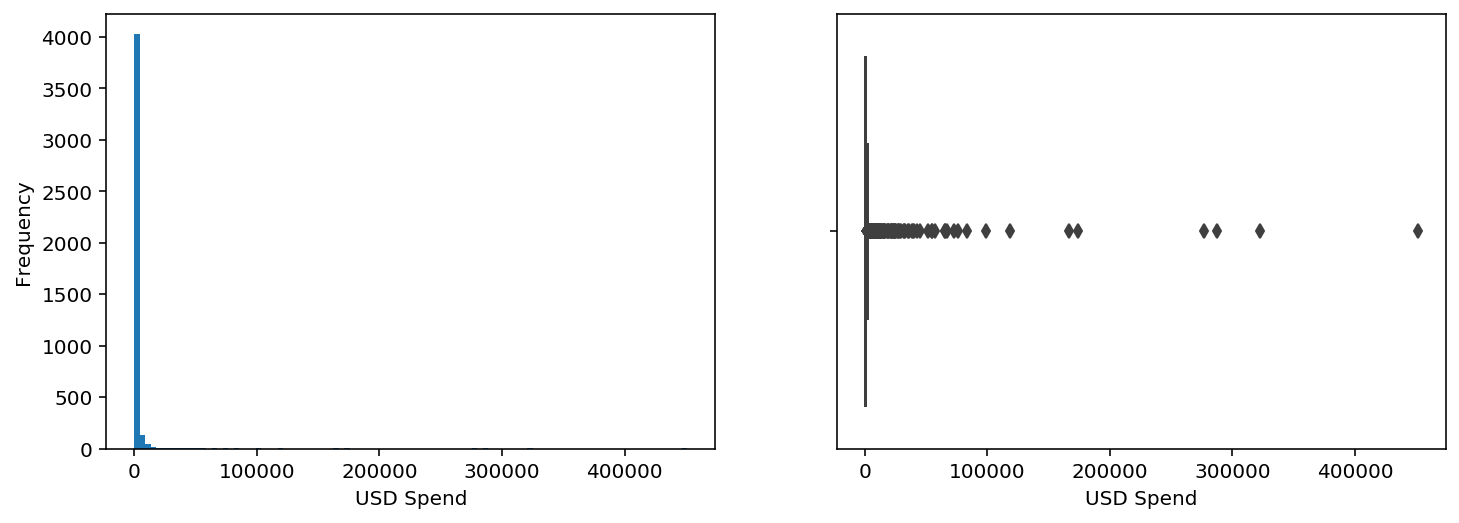

In [11]:
# Check if Spend has other abnormalities
fig, axes = plt.subplots(1, 2, figsize=(12,4))

print('range of Spend is', combined_df['USD Spend'].min(), 'to' , combined_df['USD Spend'].max())

combined_df['USD Spend'].plot(ax=axes[0], kind='hist', bins=100)
axes[0].set_xlabel('USD Spend')

# the majority of data appears to be under 30000, so let's find out how many values are over 30000
print('count over 30000:', (combined_df['USD Spend'] > 30000).sum(), 'count over 50000:', (combined_df['USD Spend'] > 50000).sum())
sns.boxplot(ax=axes[1], x=combined_df['USD Spend'])
axes[1].set_xlabel('USD Spend')

range of Impressions is 1 to 234901755


Text(0.5, 0, 'Impressions')

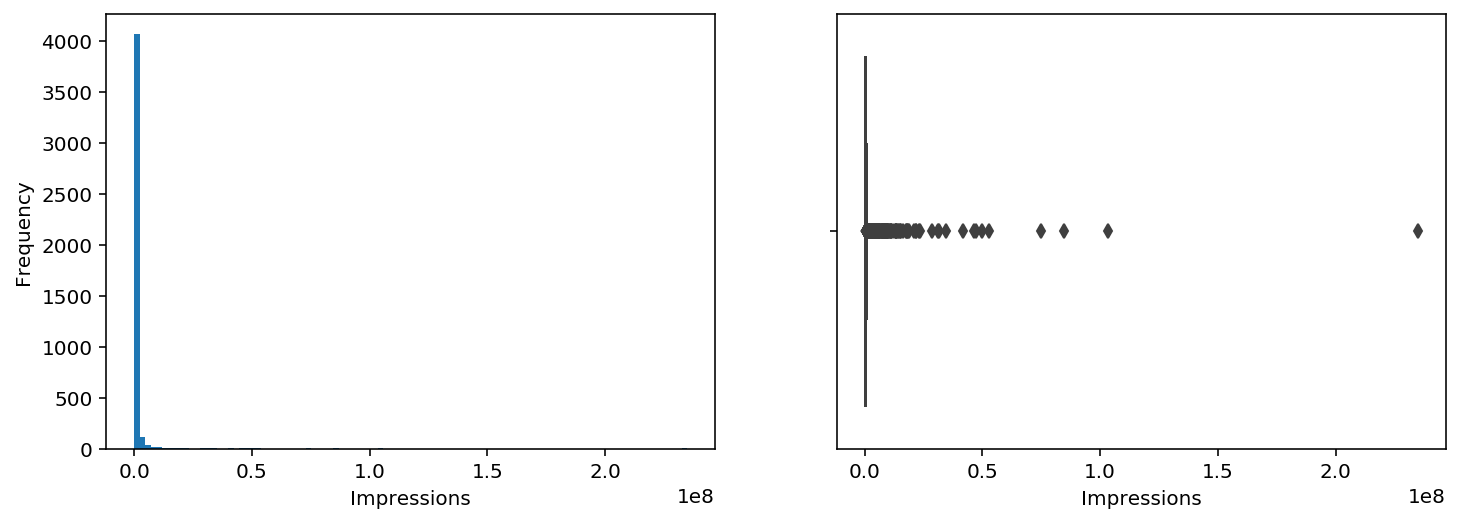

In [12]:
# Check if Impressions has abnormalities
fig, axes = plt.subplots(1, 2, figsize=(12,4))

print('range of Impressions is', combined_df['Impressions'].min(), 'to' , combined_df['Impressions'].max())

combined_df['Impressions'].plot(ax=axes[0], kind='hist', bins=100)
axes[0].set_xlabel('Impressions')
sns.boxplot(ax=axes[1], x=combined_df['Impressions'])
axes[1].set_xlabel('Impressions')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


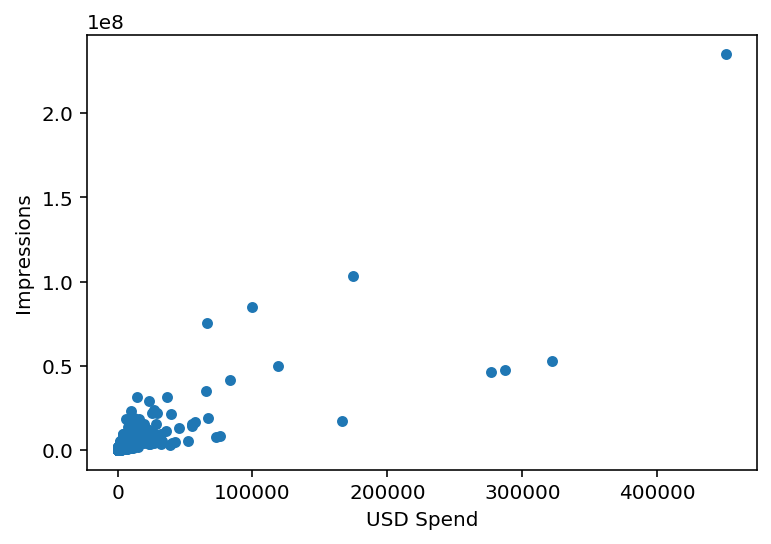

In [13]:
# As we can see in the plots above, there are quite a few potential outliers. However, in relation with each other,
# there seems to be a correlation that's worth investigating.
combined_df.plot.scatter('USD Spend', 'Impressions')

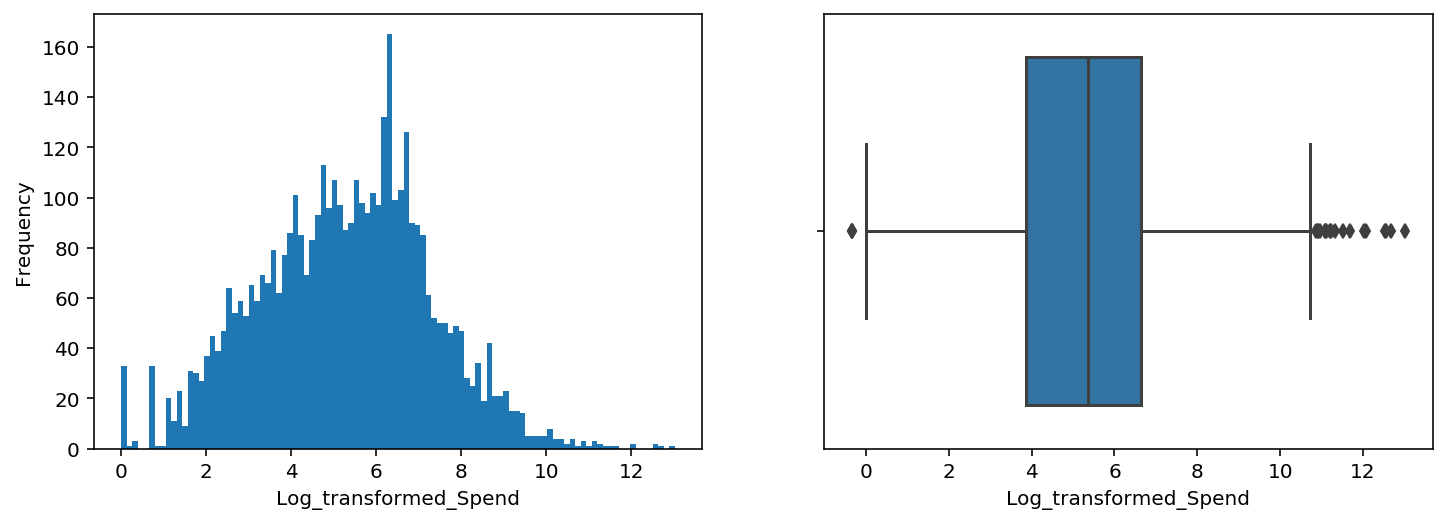

In [14]:
# As we can see in the plots above, there is a strong right skew along with quite a few potential outliers. It may be worth
# attempting a log transformation to perform more accurate analysis on the data.

# Log transformation to new column and plot
with np.errstate(divide='ignore'):
    combined_df['Log_transformed_Spend'] = np.log(combined_df['USD Spend'])

fig, axes = plt.subplots(1, 2, figsize=(12,4))

combined_df['Log_transformed_Spend'].loc[lambda x:(x >= 0) & (x<=500000)].plot(ax=axes[0], kind='hist', bins=100)
axes[0].set_xlabel('Log_transformed_Spend')

sns.boxplot(ax=axes[1], x=combined_df['Log_transformed_Spend'])

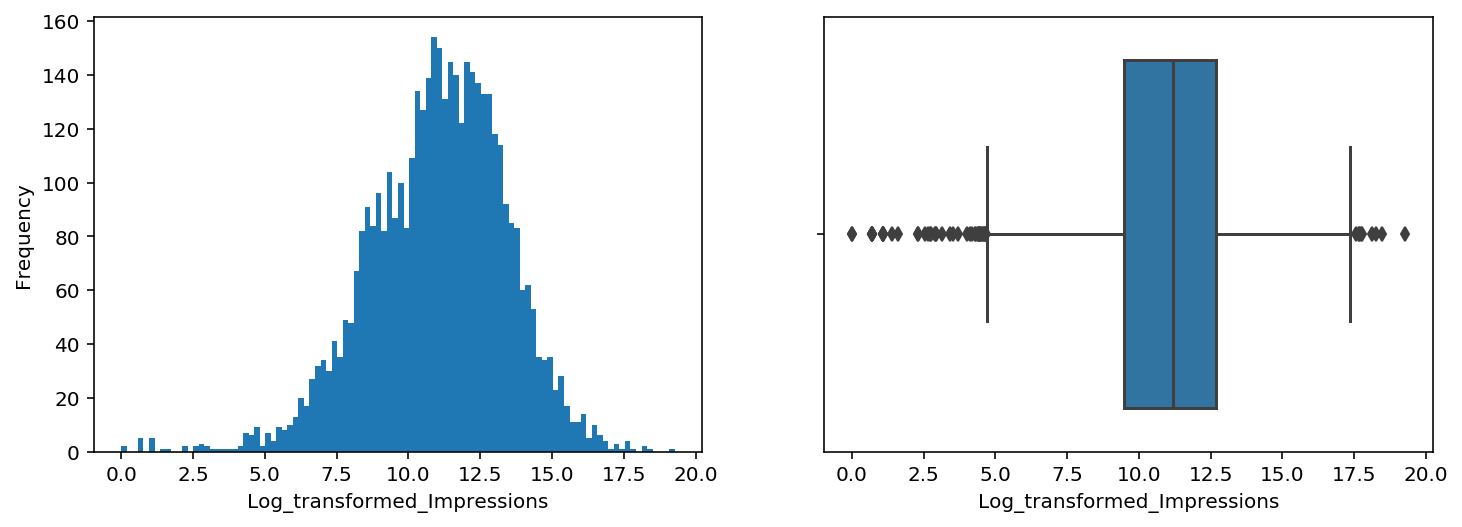

In [15]:
# As we can see in the plots above, there is a strong right skew along with quite a few potential outliers. It may be worth
# attempting a log transformation to perform more accurate analysis on the data.

# Log transformation to new column and plot
with np.errstate(divide='ignore'):
    combined_df['Log_transformed_Impressions'] = np.log(combined_df['Impressions'])

fig, axes = plt.subplots(1, 2, figsize=(12,4))

combined_df['Log_transformed_Impressions'].loc[lambda x:(x >= 0) & (x<=500000)].plot(ax=axes[0], kind='hist', bins=100)
axes[0].set_xlabel('Log_transformed_Impressions')

sns.boxplot(ax=axes[1], x=combined_df['Log_transformed_Impressions'])

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


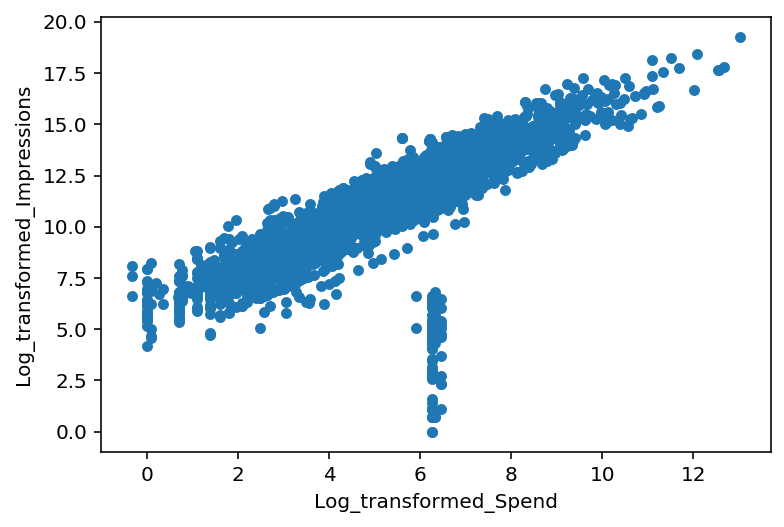

In [16]:
# After the Log transformation, the data appears to better fit a Normal distribution, thus being better to perform analysis on.
combined_df.plot.scatter('Log_transformed_Spend', 'Log_transformed_Impressions')

We can see here that there is an abnormality in `Log_transformed_Spend` due to probability imputation. Perhaps there's a way to perform an imputation conditional to Impressions, but I'm not sure how to do that.

## Which Country is most efficient in generating the most `Impressions` based on `Spend`?

In [17]:
# Using the USD Spend, we can see the different Spending based on Country.
country_df = combined_df[['CountryCode', 'USD Spend', 'Spend', 'Impressions', 'Log_transformed_Spend', 'Log_transformed_Impressions']]
country_df = country_df.groupby('CountryCode').mean()
country_df.head()

,USD Spend,Spend,Impressions,Log_transformed_Spend,Log_transformed_Impressions
CountryCode,,,,,
argentina,122.500000,122.500000,6.668550e+04,4.279170,10.607948
australia,4059.576389,6213.777778,1.237578e+06,5.439077,11.751186
austria,712.595676,659.810811,7.230335e+05,5.856673,12.650235
belgium,1019.861700,944.316389,7.125235e+05,5.662014,11.923102
brazil,634.313929,519.929450,1.000000e+01,6.452544,2.302585


Text(0.5, 1.0, 'Country Spend vs. Impressions by Mean')

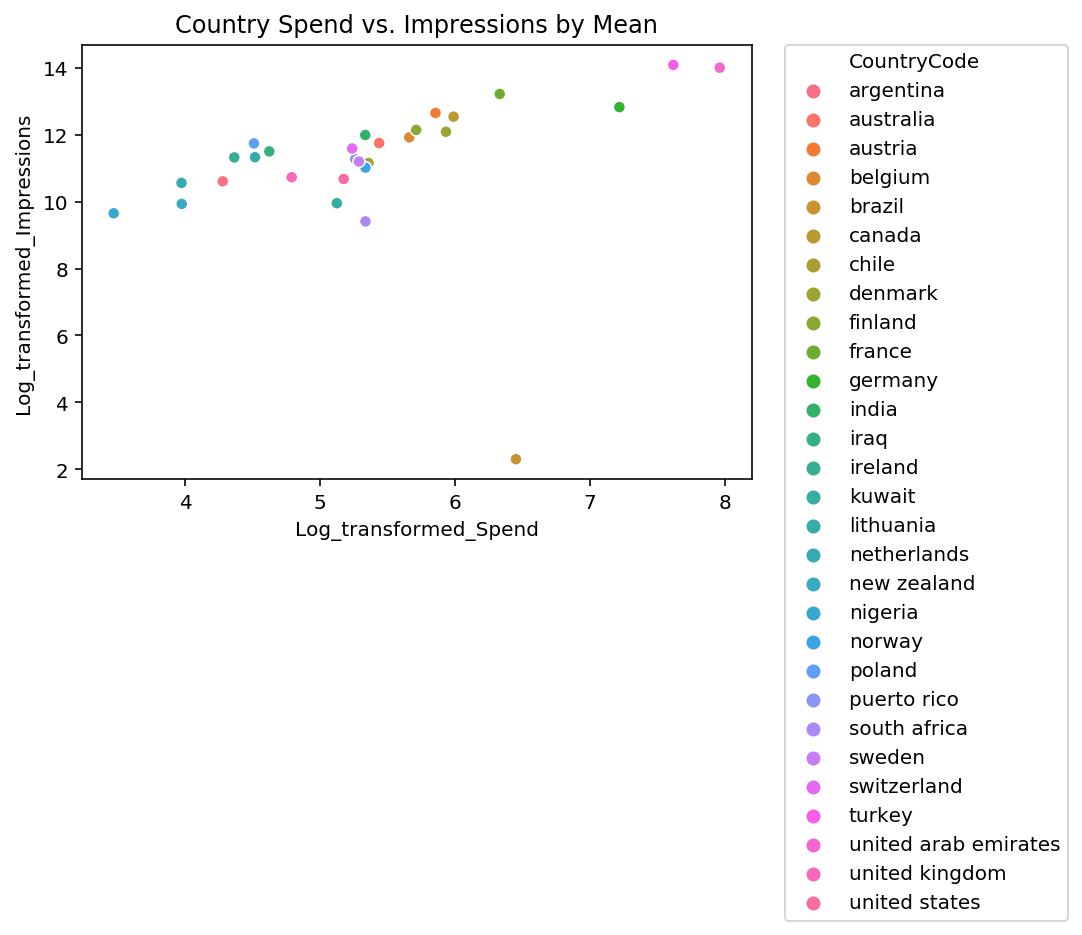

In [18]:
# Let's visualize this
country_df = country_df.reset_index()
new_plot = sns.scatterplot(x='Log_transformed_Spend', y='Log_transformed_Impressions', data=country_df,
                hue='CountryCode')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
new_plot.set_title('Country Spend vs. Impressions by Mean')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


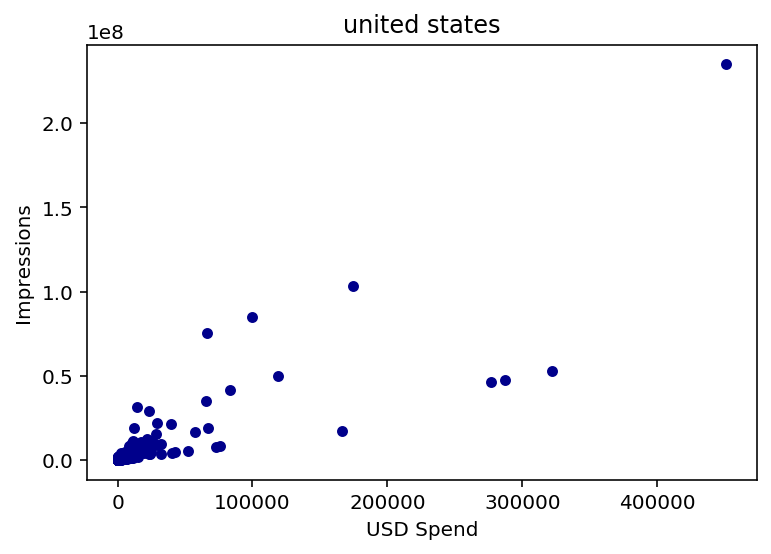

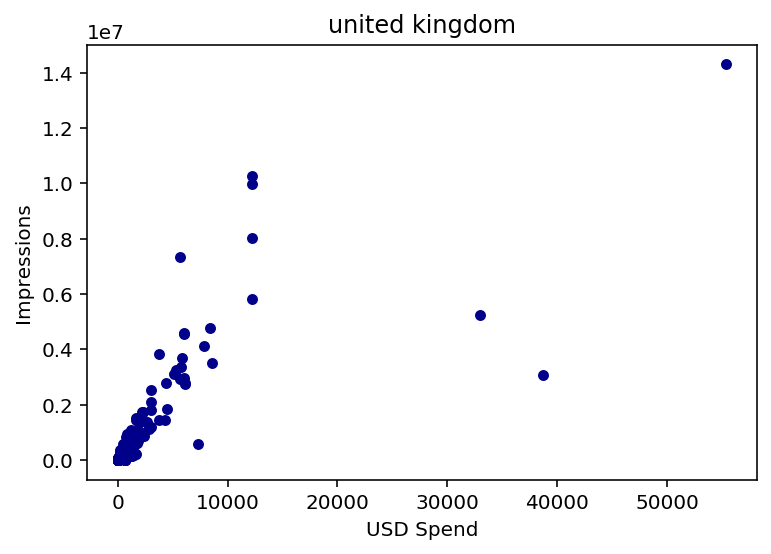

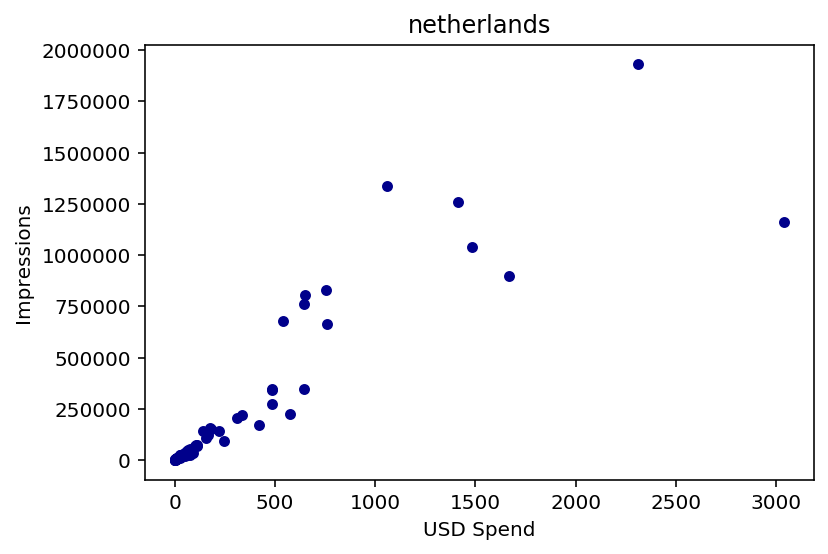

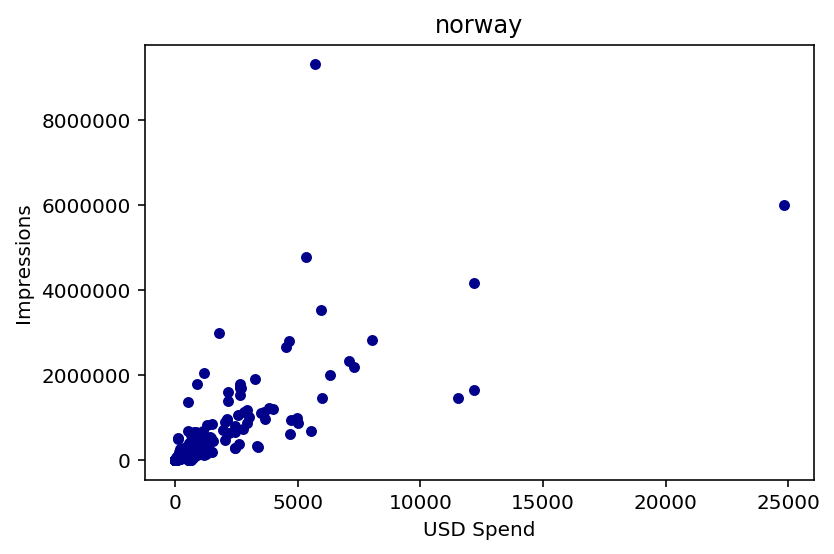

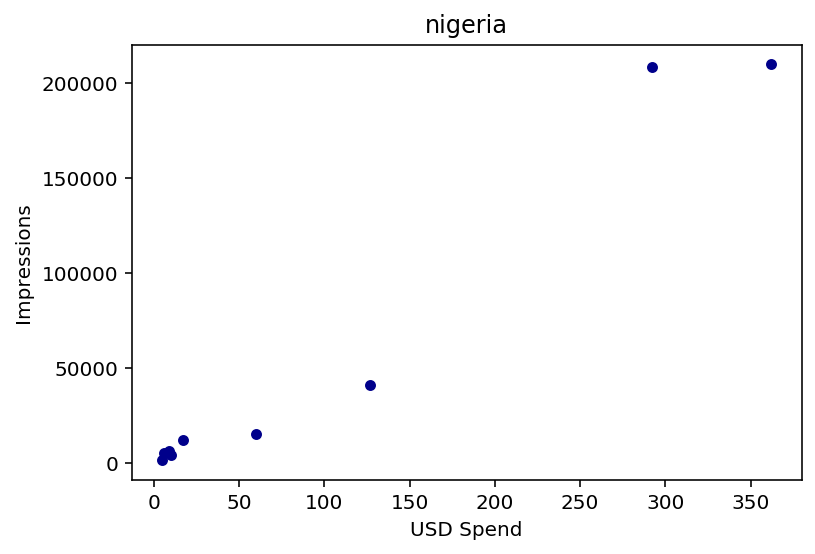

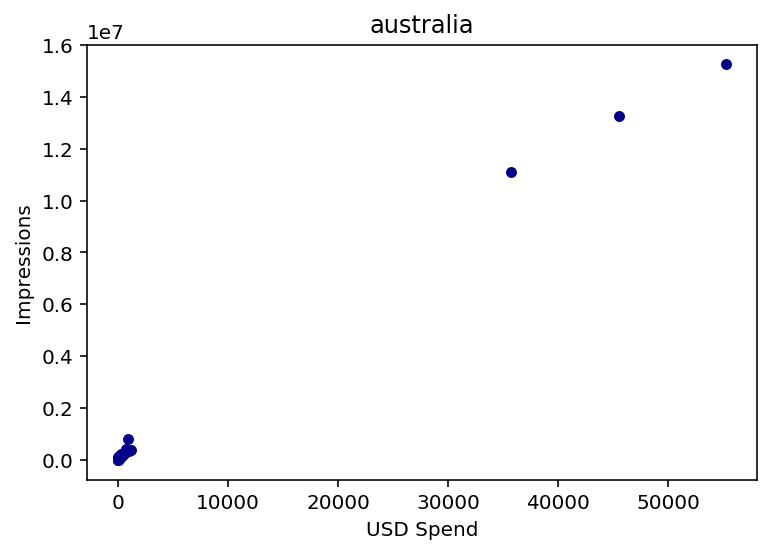

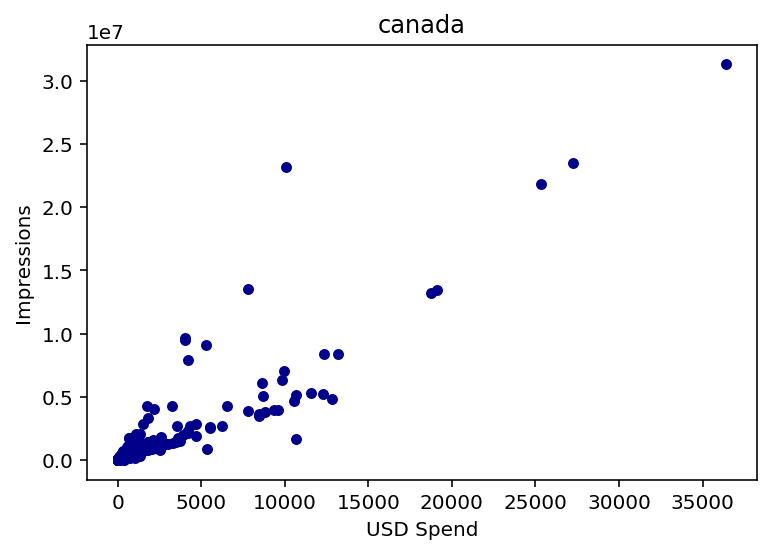

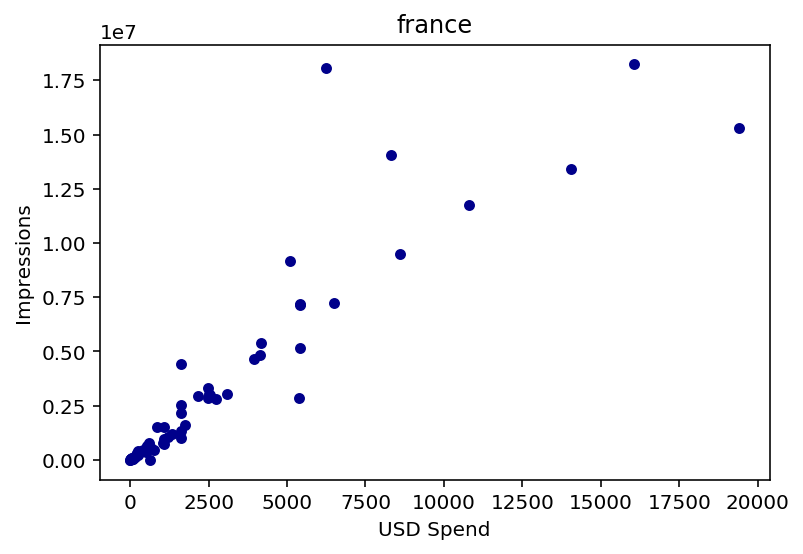

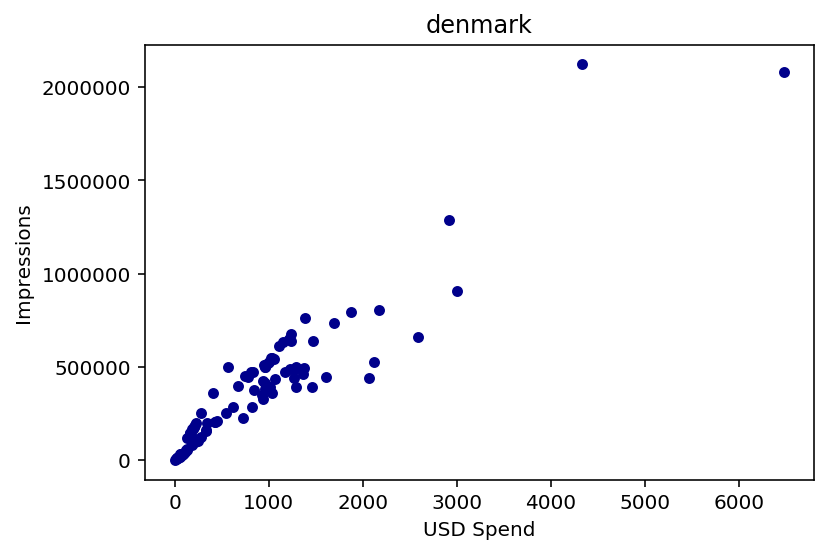

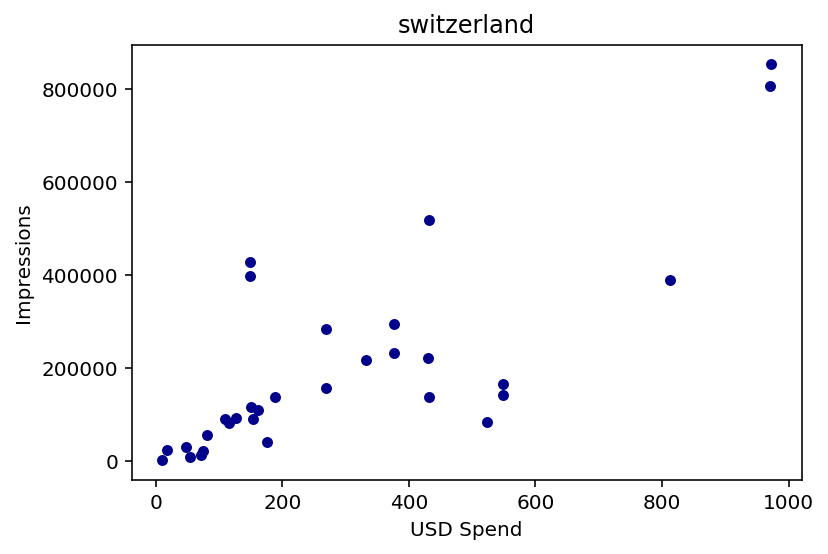

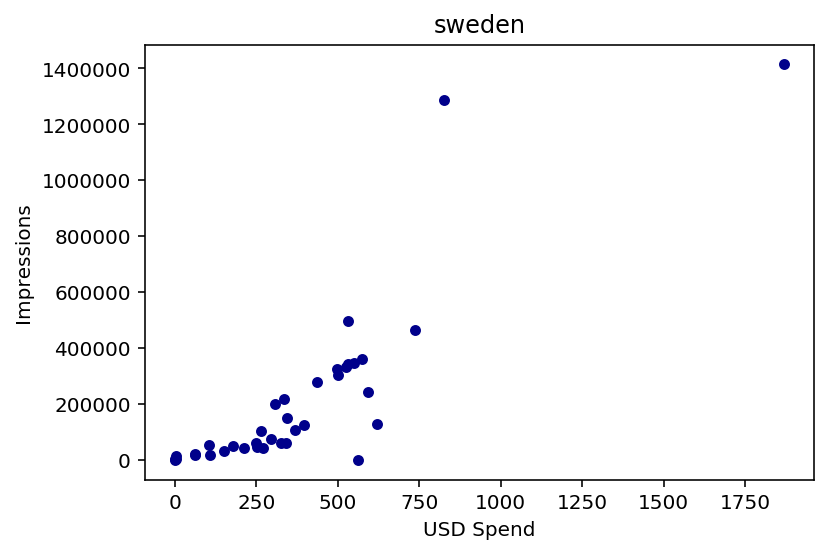

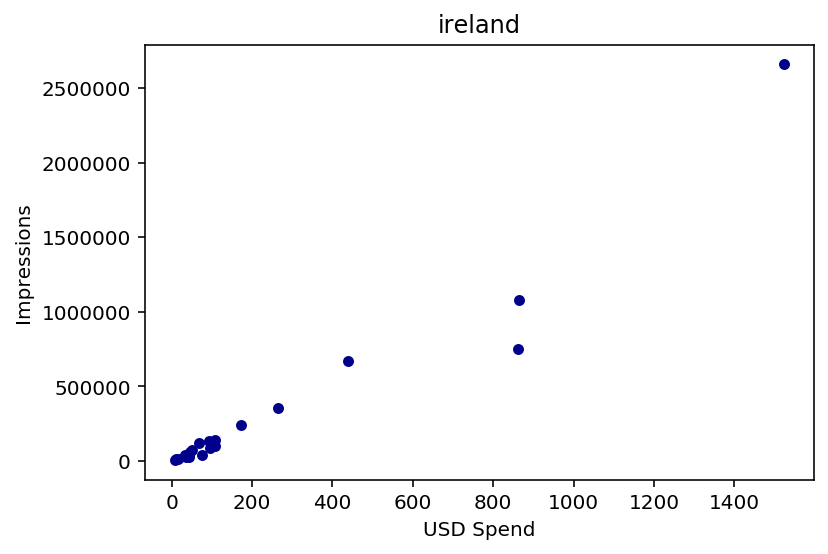

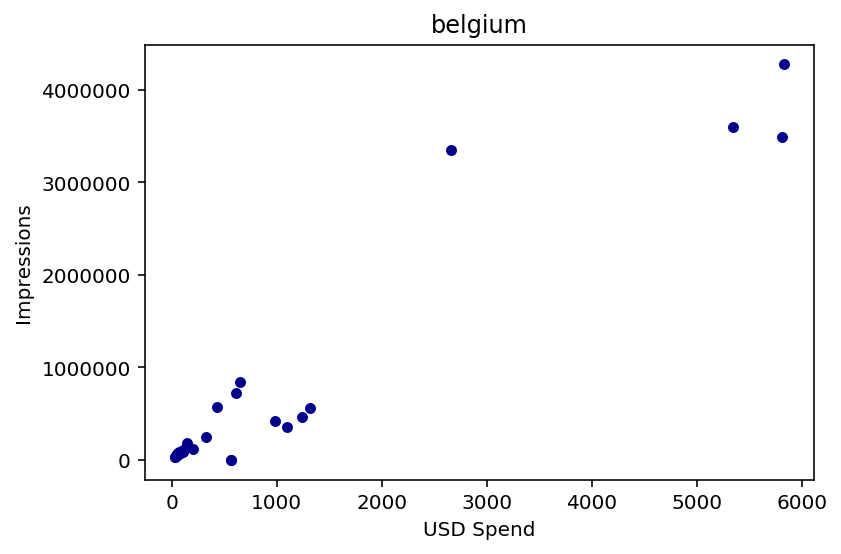

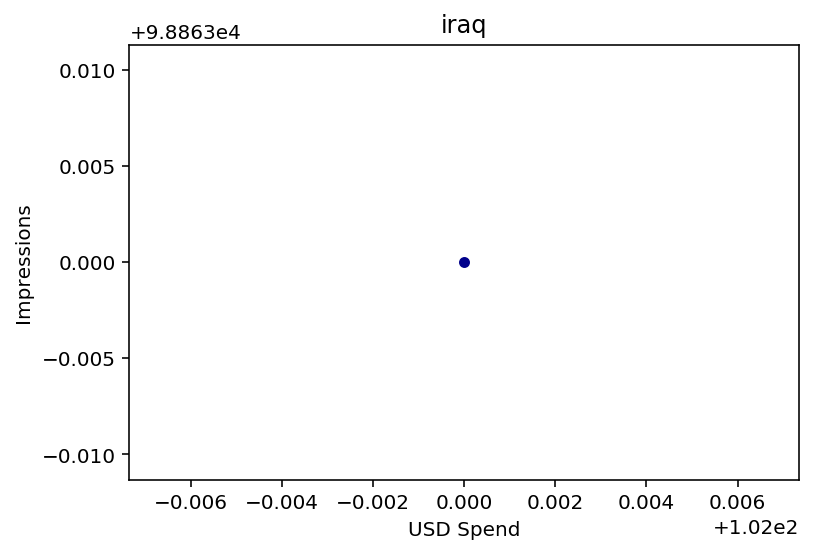

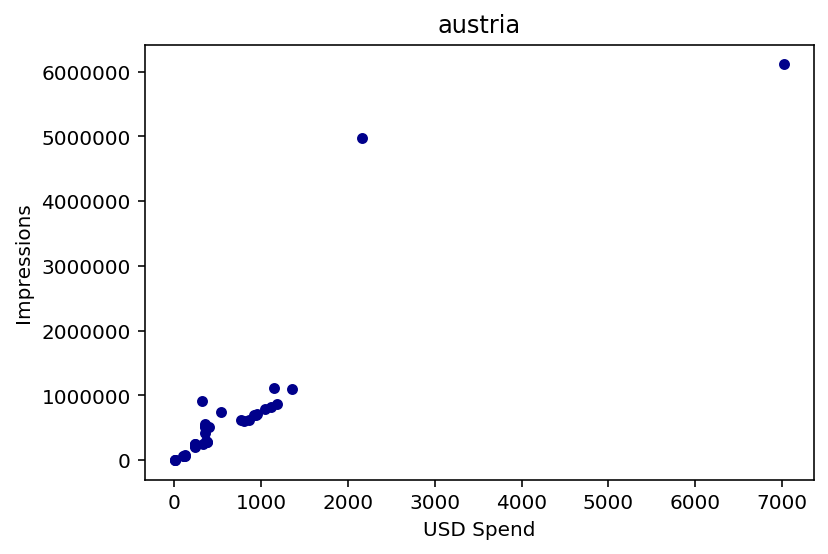

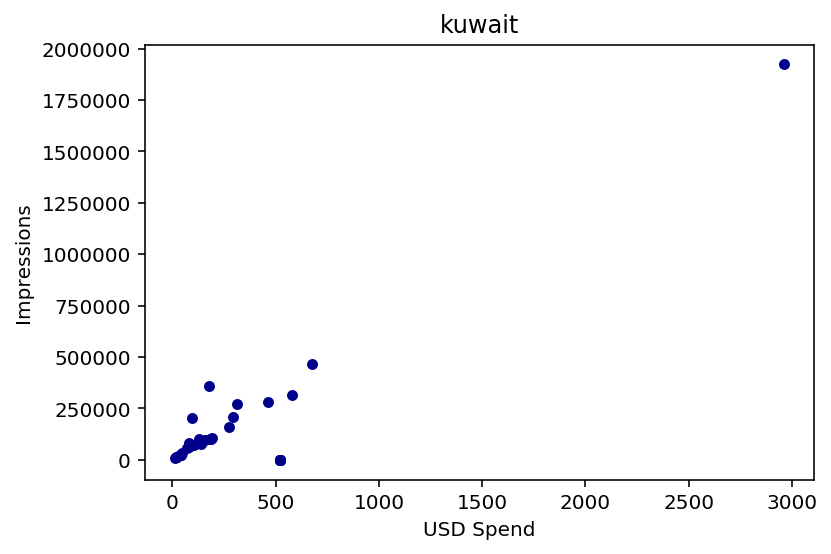

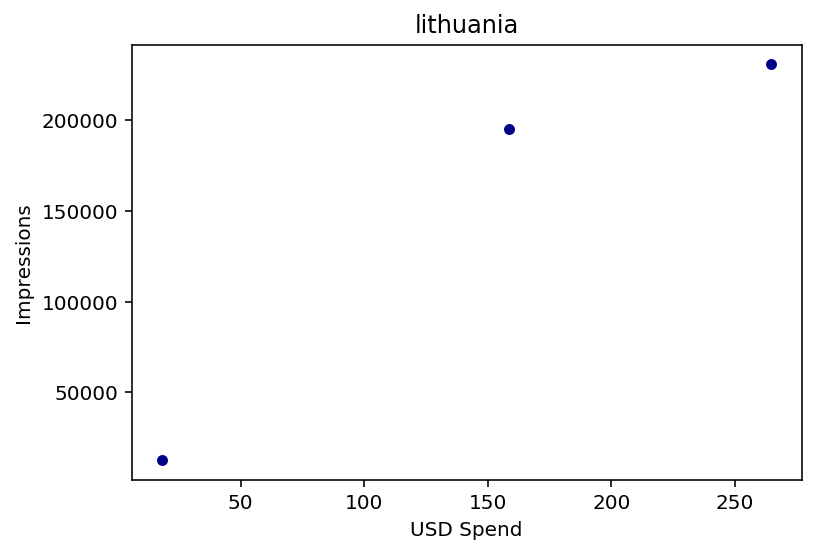

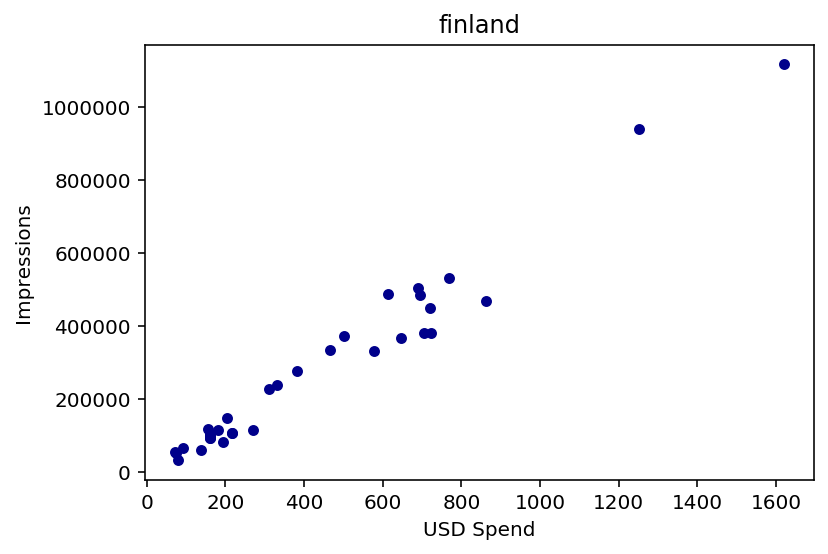

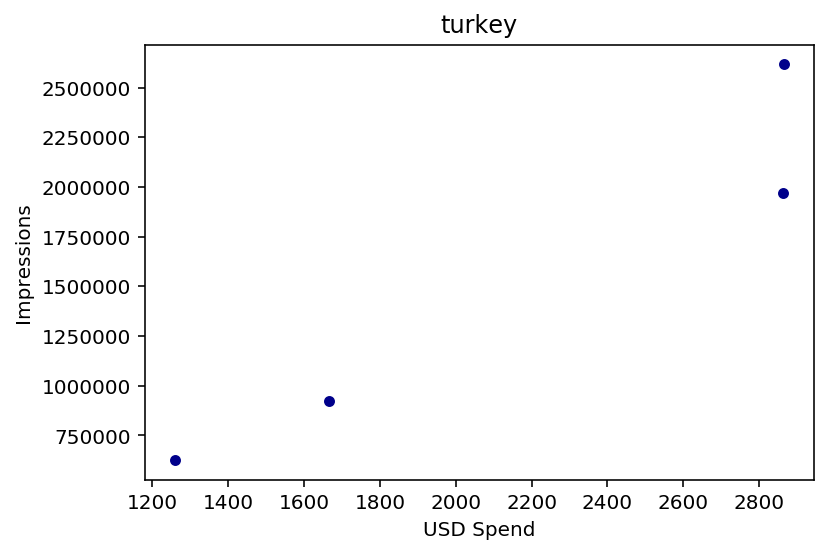

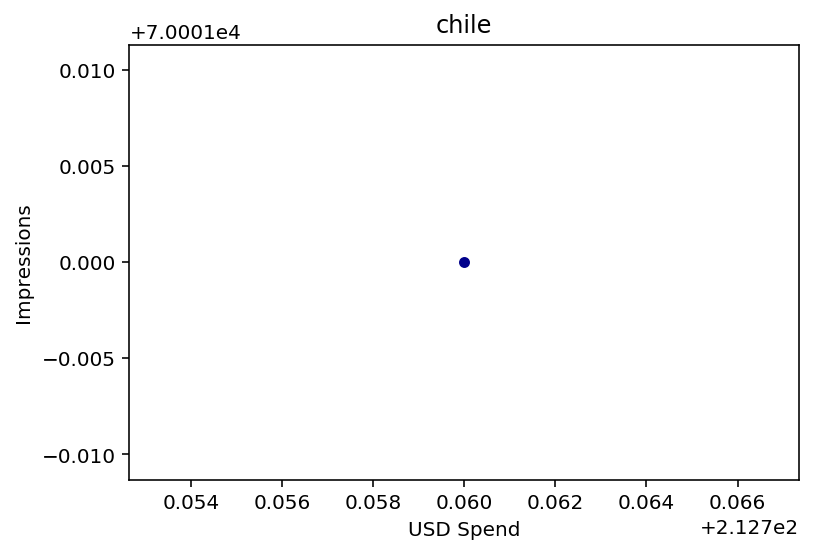

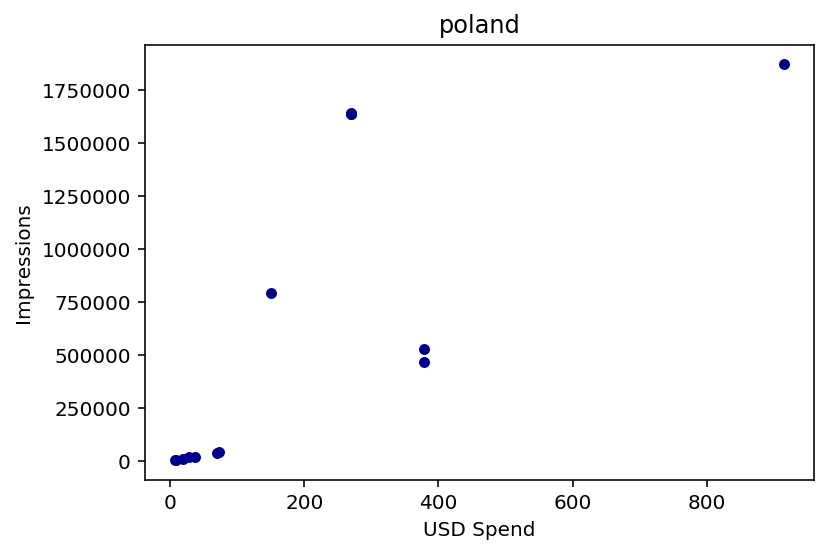

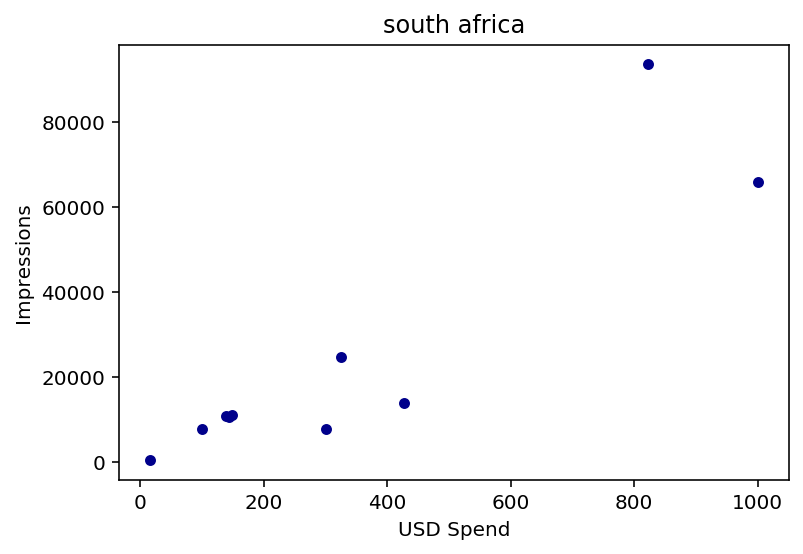

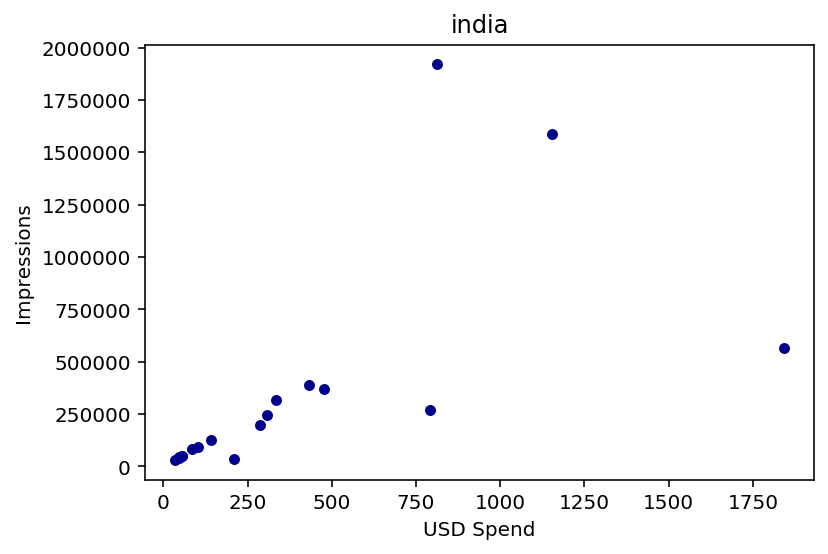

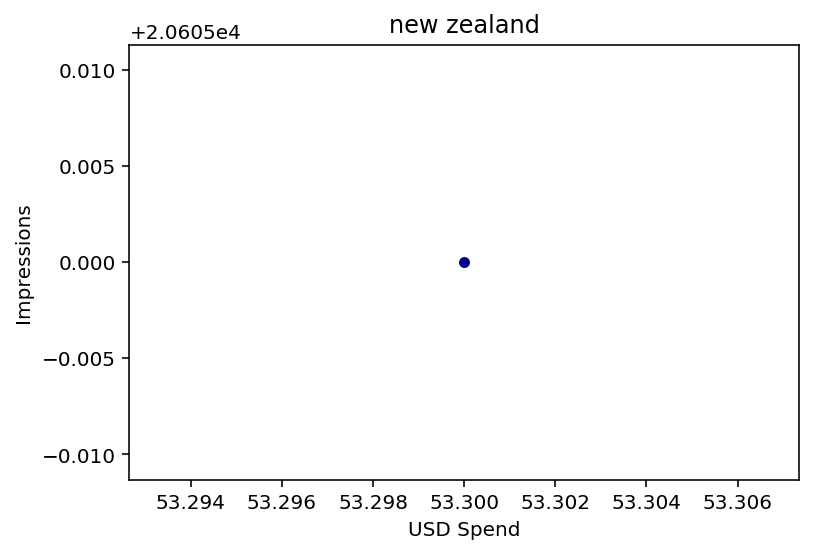

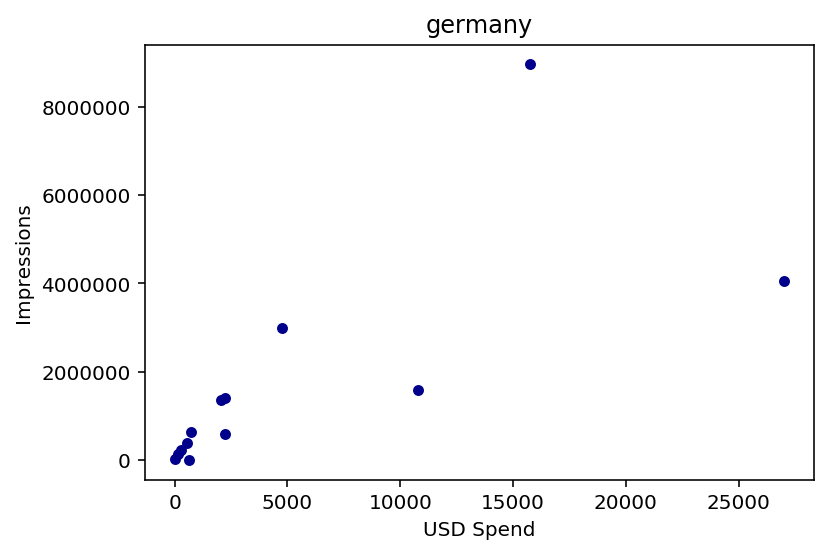

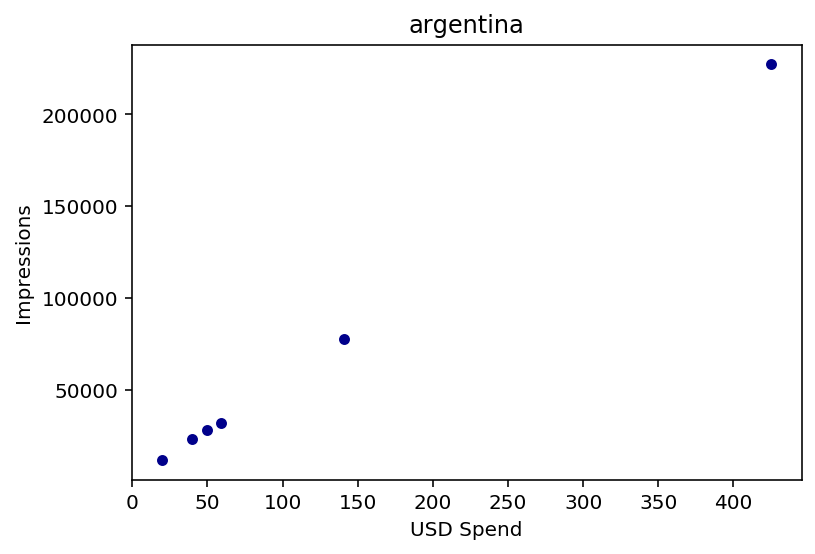

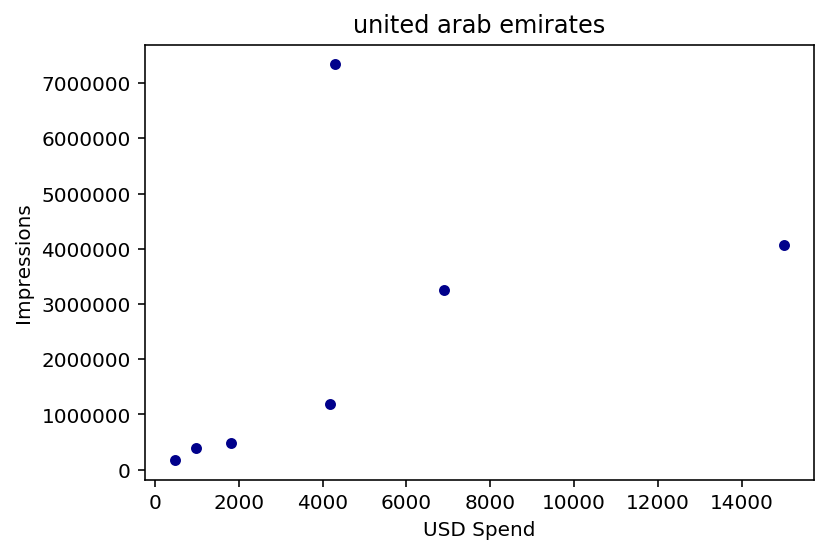

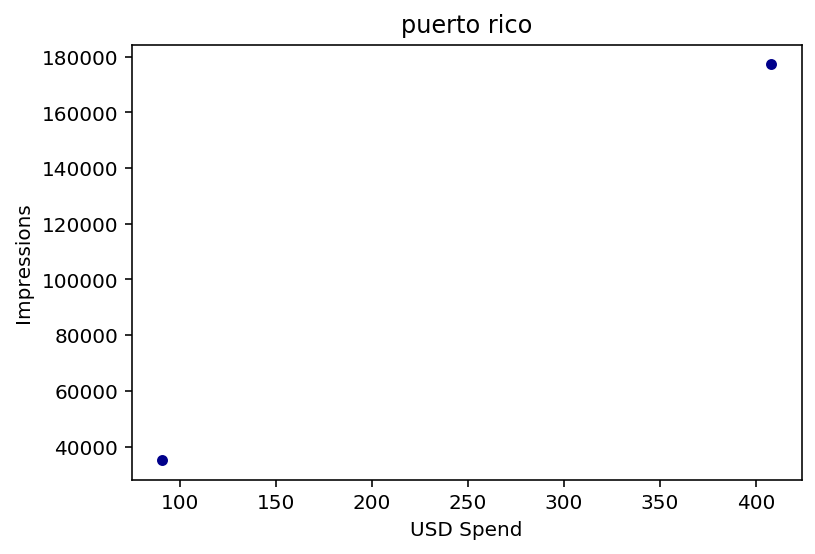

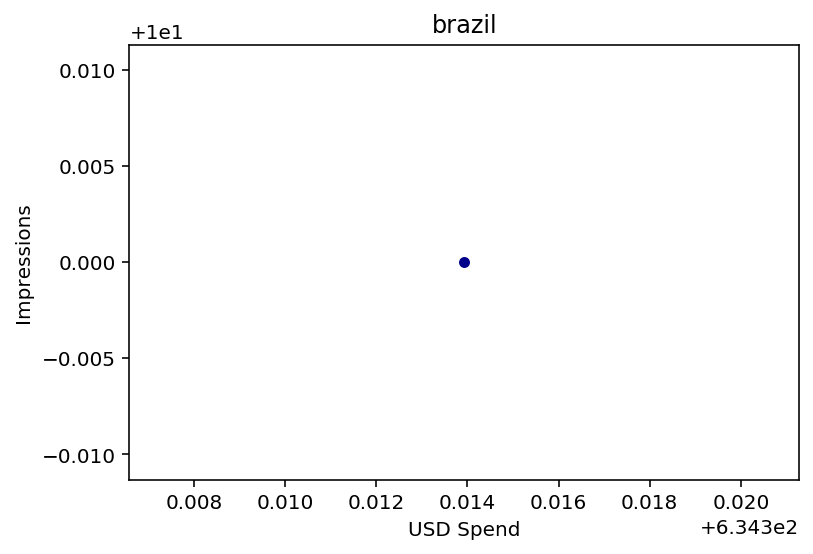

In [19]:
temp_df = combined_df[['CountryCode', 'USD Spend', 'Impressions']]
for country in temp_df['CountryCode'].unique():
    plot_df = temp_df[temp_df['CountryCode'] == country]
    plot_df.plot.scatter(x='USD Spend', y='Impressions', c='DarkBlue', title=country)

These visualizations provide a surface level view of the correlations we are interested in. Further analysis continues in the Hypothesis Test section

### Assessment of Missingness

According to the `readme.txt` file, the columns `EndDate` and `CandidateBallotInformation` aren't supposed to have NaN values, but they do have NaN's in the dataset. In this section, I will assess the missingness of just these two columns using permuatation tests with a significance level of `α = .05` because NaN's still represent a default value in the other columns.

#### EndDate Missingness

In [20]:
# First, we want to add an isnull column for each column we want to assess.
combined_df['EndDate_isnull'] = combined_df.EndDate.isnull()
combined_df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,USD Spend,Log_transformed_Spend,Log_transformed_Impressions,EndDate_isnull
0,3543bda6548f0e2c5ebfbac43c7443cc2383e90e2761ca...,https://www.snap.com/political-ads/asset/4eb5f...,USD,623.0,55373,2018-10-18 16:57:38+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,623.00,6.434547,10.921847,False
1,8ee4c45b5b6fcf1fb40a169177e79ebd2b39c8a3930703...,https://www.snap.com/political-ads/asset/91b82...,GBP,118.0,48450,2018-10-05 15:50:13+00:00,2018-10-14 23:30:00+00:00,The Labour Party,"Kings Manor,Newcastle,NE16PA,GB",NaN,...,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://labour.org.uk/register-to...,143.96,4.969535,10.788288,False
2,0e7e1d4cca496a43a93143342f7749fea8c415e45a5146...,https://www.snap.com/political-ads/asset/560f0...,USD,45.0,13965,2018-09-25 20:57:04+00:00,2018-09-30 03:59:59+00:00,ACRONYM,US,NaN,...,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote,45.00,3.806662,9.544309,False
3,ad346ac624a818fdee801416f09a18442a0b80d5e6ea17...,https://www.snap.com/political-ads/asset/11917...,USD,971.0,91817,2018-10-18 17:48:51+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,971.00,6.878326,11.427553,False
4,a8a3a66880fd17c6c3863f1f38373d95ec2551f204eed1...,https://www.snap.com/political-ads/asset/eb9d0...,USD,102.0,31835,2018-10-09 00:17:27+00:00,NaT,OpenPoll Inc,US,NaN,...,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/b856fce8...,102.00,4.624973,10.368322,True


In [21]:
# We now want to create a function that will determine the p-val for missingness of EndDate against another column. We will then use this
# function in a for loop that runs through all the other columns of the dataset to determine if EndDate is missing conditional to another
# column
def enddate_missing_pval(col):
    
    if len(combined_df[col].dropna()) == 0:
        return 1.0
    
    emp_distributions = (
    combined_df
    .pivot_table(columns='EndDate_isnull', index=col, values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
    )
        
    obs = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    
    n_repetitions = 500

    col_enddatenull = combined_df.copy()[[col, 'EndDate_isnull']]
    tvds = []
    for _ in range(n_repetitions):

        # shuffle the colors
        shuffled_col = (
            col_enddatenull[col]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )

        # put them in a table
        shuffled = (
            col_enddatenull
            .assign(**{'Shuffled ' + col: shuffled_col})
        )

        # compute the tvd
        shuffed_emp_distributions = (
            shuffled
            .pivot_table(columns='EndDate_isnull', index='Shuffled ' + col, values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x:x/x.sum())
        )
        
        try:
            tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
            # add it to the list of results
            tvds.append(tvd)
        except:
            tvd = None

        if all(item == None for item in tvds):
            return 1.0
        
    return np.count_nonzero(tvds <= obs) / len(tvds)

In [22]:
temp_df = combined_df.drop(['EndDate', 'EndDate_isnull'], axis=1)
enddate_missingness = []
for col in temp_df.columns:
    p_val = enddate_missing_pval(col)
    if float(p_val) < .05:
        enddate_missingness.append(col + " pval: " + str(p_val))
    print(col + " pval: " + str(p_val))
enddate_missingness

ADID pval: 1.0
CreativeUrl pval: 1.0
Currency Code pval: 1.0
Spend pval: 1.0
Impressions pval: 1.0
StartDate pval: 1.0
OrganizationName pval: 1.0
BillingAddress pval: 1.0
CandidateBallotInformation pval: 1.0
PayingAdvertiserName pval: 1.0
Gender pval: 0.992
AgeBracket pval: 1.0
CountryCode pval: 1.0
Regions (Included) pval: 1.0
Regions (Excluded) pval: 0.984
Electoral Districts (Included) pval: 0.0
Electoral Districts (Excluded) pval: 1.0
Radius Targeting (Included) pval: 1.0
Radius Targeting (Excluded) pval: 0.09
Metros (Included) pval: 1.0
Metros (Excluded) pval: 1.0
Postal Codes (Included) pval: 1.0
Postal Codes (Excluded) pval: 1.0
Location Categories (Included) pval: 0.21
Location Categories (Excluded) pval: 1.0
Interests pval: 1.0
OsType pval: 0.68
Segments pval: 1.0
Language pval: 1.0
AdvancedDemographics pval: 1.0
Targeting Connection Type pval: 1.0
Targeting Carrier (ISP) pval: 1.0
CreativeProperties pval: 1.0
USD Spend pval: 1.0
Log_transformed_Spend pval: 1.0
Log_transformed

['Electoral Districts (Included) pval: 0.0']

`Electoral Districts (Included)` p-val would fall under the significance value, thus suggesting that `EndDate` missingness is **MAR** dependent on  `Electoral Districts (Included)`.

#### CandidateBallotInformation Missingness

In [23]:
combined_df['cbi_isnull'] = combined_df.CandidateBallotInformation.isnull()
combined_df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,USD Spend,Log_transformed_Spend,Log_transformed_Impressions,EndDate_isnull,cbi_isnull
0,3543bda6548f0e2c5ebfbac43c7443cc2383e90e2761ca...,https://www.snap.com/political-ads/asset/4eb5f...,USD,623.0,55373,2018-10-18 16:57:38+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,623.00,6.434547,10.921847,False,True
1,8ee4c45b5b6fcf1fb40a169177e79ebd2b39c8a3930703...,https://www.snap.com/political-ads/asset/91b82...,GBP,118.0,48450,2018-10-05 15:50:13+00:00,2018-10-14 23:30:00+00:00,The Labour Party,"Kings Manor,Newcastle,NE16PA,GB",NaN,...,en,NaN,NaN,NaN,web_view_url:https://labour.org.uk/register-to...,143.96,4.969535,10.788288,False,True
2,0e7e1d4cca496a43a93143342f7749fea8c415e45a5146...,https://www.snap.com/political-ads/asset/560f0...,USD,45.0,13965,2018-09-25 20:57:04+00:00,2018-09-30 03:59:59+00:00,ACRONYM,US,NaN,...,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote,45.00,3.806662,9.544309,False,True
3,ad346ac624a818fdee801416f09a18442a0b80d5e6ea17...,https://www.snap.com/political-ads/asset/11917...,USD,971.0,91817,2018-10-18 17:48:51+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,971.00,6.878326,11.427553,False,True
4,a8a3a66880fd17c6c3863f1f38373d95ec2551f204eed1...,https://www.snap.com/political-ads/asset/eb9d0...,USD,102.0,31835,2018-10-09 00:17:27+00:00,NaT,OpenPoll Inc,US,NaN,...,NaN,NaN,NaN,NaN,web_view_url:https://poll.openpoll.io/b856fce8...,102.00,4.624973,10.368322,True,True


In [24]:
# We now want to create a function that will determine the p-val for missingness of CandidateBallotInformation against another column.
# We will then use this function in a for loop that runs through all the other columns of the dataset to determine if EndDate is
# missing conditional to another column
def cbi_missing_pval(col):
    
    if len(combined_df[col].dropna()) == 0:
        return 1.0
    
    emp_distributions = (
    combined_df
    .pivot_table(columns='cbi_isnull', index=col, values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
    )
    
    obs = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    
    n_repetitions = 500

    col_cbinull = combined_df.copy()[[col, 'cbi_isnull']]
    tvds = []
    for _ in range(n_repetitions):

        # shuffle the colors
        shuffled_col = (
            col_cbinull[col]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )

        # put them in a table
        shuffled = (
            col_cbinull
            .assign(**{'Shuffled ' + col: shuffled_col})
        )

        # compute the tvd
        shuffed_emp_distributions = (
            shuffled
            .pivot_table(columns='cbi_isnull', index='Shuffled ' + col, values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x:x/x.sum())
        )
        
        try:
            tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
            # add it to the list of results
            tvds.append(tvd)
        except:
            tvd = None

        if all(item == None for item in tvds):
            return 1.0
        
    return np.count_nonzero(tvds <= obs) / len(tvds)

In [25]:
temp_df = combined_df.drop(['CandidateBallotInformation', 'cbi_isnull'], axis=1)
cbi_missingness = []
for col in temp_df.columns:
    p_val = cbi_missing_pval(col)
    if float(p_val) < .05:
        cbi_missingness.append(col + " pval: " + str(p_val))
    print(col + " pval: " + str(p_val))
cbi_missingness

ADID pval: 1.0
CreativeUrl pval: 1.0
Currency Code pval: 1.0
Spend pval: 0.968
Impressions pval: 1.0
StartDate pval: 1.0
EndDate pval: 1.0
OrganizationName pval: 1.0
BillingAddress pval: 1.0
PayingAdvertiserName pval: 1.0
Gender pval: 1.0
AgeBracket pval: 1.0
CountryCode pval: 1.0
Regions (Included) pval: 1.0
Regions (Excluded) pval: 1.0
Electoral Districts (Included) pval: 0.0
Electoral Districts (Excluded) pval: 1.0
Radius Targeting (Included) pval: 1.0
Radius Targeting (Excluded) pval: 1.0
Metros (Included) pval: 1.0
Metros (Excluded) pval: 0.08
Postal Codes (Included) pval: 1.0
Postal Codes (Excluded) pval: 1.0
Location Categories (Included) pval: 0.088
Location Categories (Excluded) pval: 1.0
Interests pval: 1.0
OsType pval: 0.046
Segments pval: 1.0
Language pval: 1.0
AdvancedDemographics pval: 1.0
Targeting Connection Type pval: 1.0
Targeting Carrier (ISP) pval: 1.0
CreativeProperties pval: 1.0
USD Spend pval: 1.0
Log_transformed_Spend pval: 1.0
Log_transformed_Impressions pval: 

['Electoral Districts (Included) pval: 0.0', 'OsType pval: 0.046']

`Electoral Districts (Included)` p-val would fall under the significance value, thus suggesting that `CandidateBallotInformation` missingness is **MAR** dependent on  `Electoral Districts (Included)`. In addition, `OSType` comes very close to the significance level of 0.5. Perhaps due to the sampling, there's a chance `CandidateBallotInformation` is also **MAR** dependent on `OSType`.

### Hypothesis Test

So, continuing off of the EDA section, my question is:

Which Country is most efficient in generating the most `Impressions` based on `Spend`?

My hypothesis is that there is, on average, higher Impression counts based on Spend amounts in countries with the highest Currency value.

 - Null Hypothesis: There is no difference in Impression counts based on Spending across all countries.

 - Alternative Hypothesis: Entries with the highest currency value will have higher Impression counts based on Spending than countries with lower currency values.

 - Test-statistic: Average Impressions per USD spent

 - Significance level: .05

In [26]:
efficiency_df = combined_df[['Currency Code', 'Spend', 'Impressions', 'CountryCode', 'USD Spend', 'Log_transformed_Spend', 'Log_transformed_Impressions']]

In [27]:
# Here's a simulation with an arbitrary sample size of 100 using random seed 2468 for study reproducibility

np.random.seed(2468)

N_trials =  5000
test_stats = []

for i in np.arange(N_trials):
    random_sample = efficiency_df.sample(100, replace=False)
    new_average = np.mean(random_sample['Impressions'] / random_sample['USD Spend'])
    test_stats.append(new_average)
    
test_stats = np.array(test_stats)

In [28]:
# Find the observed avg of entries using the most expensive currency
observed_avg = efficiency_df[efficiency_df['Currency Code'] == 'GBP']
observed_avg = np.mean(observed_avg['Impressions'] / observed_avg['USD Spend'])

In [29]:
# Calculate p-val
pval = np.count_nonzero(test_stats <= observed_avg) / N_trials
pval

0.2636

Because the p-val of 0.2636 is larger than our significance level of 0.05, we fail to reject the null hypothesis. Thus, we conclude that there is no significant difference in Impressions per USD Spending between entries that use highest value currency and entries that use lower value currencies.

In [30]:
# However, let's repeat the simulation using log transformed data

np.random.seed(2468)

N_trials =  5000
test_stats = []

for i in np.arange(N_trials):
    random_sample = efficiency_df.sample(100, replace=False)
    new_average = np.mean(random_sample['Log_transformed_Impressions'] / random_sample['Log_transformed_Spend'])
    test_stats.append(new_average)
    
test_stats = np.array(test_stats)

In [31]:
# Find the observed avg of entries using the most expensive currency
observed_avg = efficiency_df[efficiency_df['Currency Code'] == 'GBP']
observed_avg = np.mean(observed_avg['Log_transformed_Impressions'] / observed_avg['Log_transformed_Spend'])

In [32]:
# Calculate p-val
pval = np.count_nonzero(test_stats <= observed_avg) / N_trials
pval

0.4204

Because the p-val of 0.4202 is larger than our significance level of 0.05, we fail to reject the null hypothesis. Thus, we conclude that there is no significant difference in *Log transformed* Impressions per USD Spending between entries that use highest value currency and entries that use lower value currencies.

In [33]:
# Now, let's compare just the highest value currency and lowest value currency

new_curr_df = efficiency_df[(efficiency_df['Currency Code'] == 'GBP') | (efficiency_df['Currency Code'] == 'AUD')]

np.random.seed(2468)

N_trials =  5000
test_stats = []

for i in np.arange(N_trials):
    random_sample = new_curr_df.sample(100, replace=False)
    new_average = np.mean(random_sample['Impressions'] / random_sample['Spend'])
    test_stats.append(new_average)
    
test_stats = np.array(test_stats)

In [34]:
# Find the observed avg of entries using the most expensive currency
observed_avg = efficiency_df[efficiency_df['Currency Code'] == 'GBP']
observed_avg = np.mean(observed_avg['Impressions'] / observed_avg['Spend'])

In [35]:
# Calculate p-val
pval = np.count_nonzero(test_stats <= observed_avg) / N_trials
pval

0.638

Because the p-val of 0.638 is larger than our significance level of 0.05, we fail to reject the null hypothesis. Thus, we conclude that there is no significant difference in Impressions per USD Spending between entries that use the highest value currency and entries that use the lowest value currency.

I investigated these attributes of the data because I predicted a correlation between currency value and Impressions per USD spent. Currency value is typically a sign of inflation which is generally healthy for an economy. Because of this, I assumed there would be strong political advertising from all companies including SnapChat. More Impressions means more advertising exposure, thus Impressions per USD spent represents the efficiency of the ad's funding.

In the future, this study can be improved by simulating more variations and combinations of currencies.